### 2021_11_03_1

### MNIST Dataset을 활용한 딥러닝 모델 구현

In [1]:
import tensorflow as tf
import keras
import sys

In [2]:
print("tensorflow version :", tf.__version__)
print("keras version :", keras.__version__)
print("sys version :", sys.version)

tensorflow version : 2.6.1
keras version : 2.6.0
sys version : 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


In [8]:
import numpy as np # 선형대수 관련(배열 생성 관련)
import matplotlib  # 시각화
import matplotlib.pyplot as plt

In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


### 손글씨 데이터 시각화
* y_train : 손글씨 그림의 숫자(0~9) 정보
* x_train : 손글씨 그림의 픽셀정보(28x28) 총 784개의 픽셀정보

label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


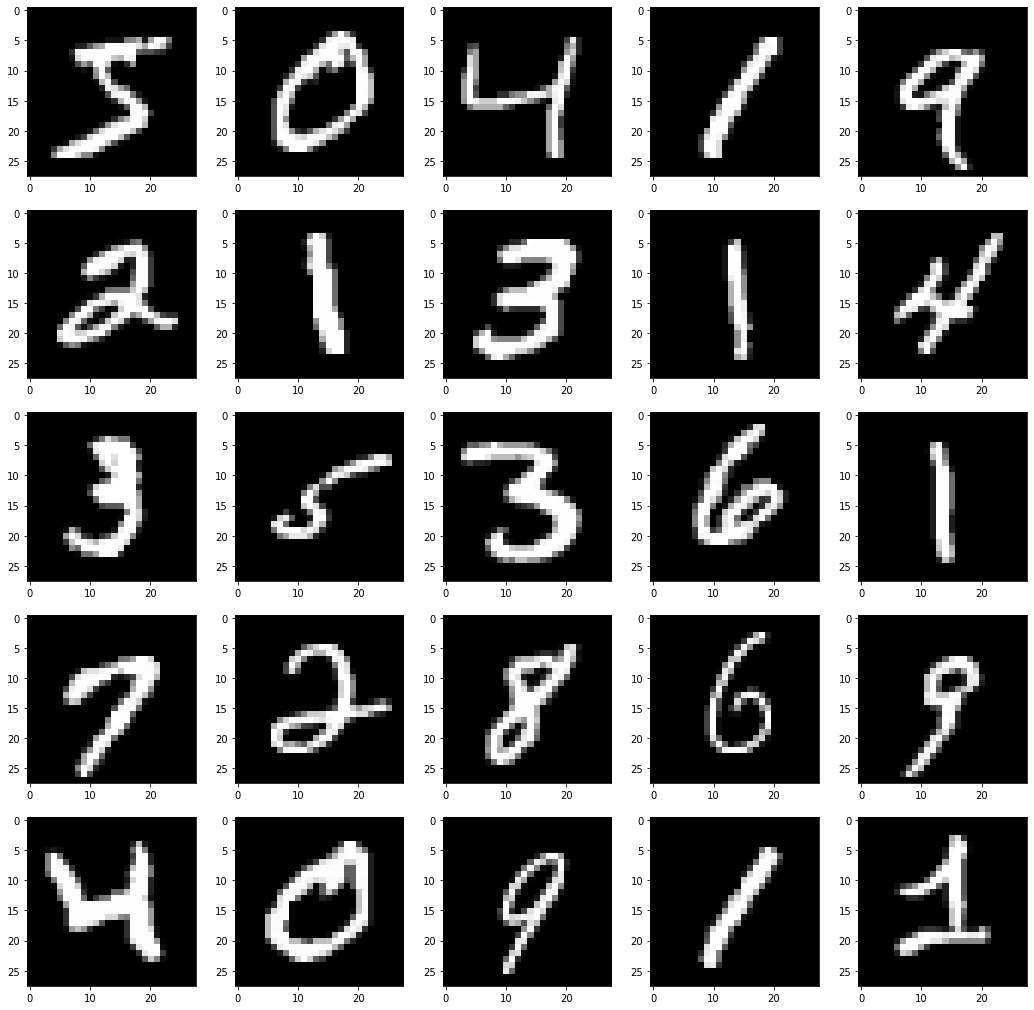

In [11]:
figure, axes = plt.subplots(nrows = 5, ncols = 5) # 3행 5열의 구조
figure.set_size_inches(18, 18) # 전체 크기

plt.gray()
print("label = {}".format(y_train[0 : 25])) # x데이터 0 ~ 24개 가져오기

col = 0
for row in range(0, 5) :
    col = row * 5
    axes[row][0].imshow(X_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(X_train[col + 1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(X_train[col + 2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(X_train[col + 3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(X_train[col + 4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


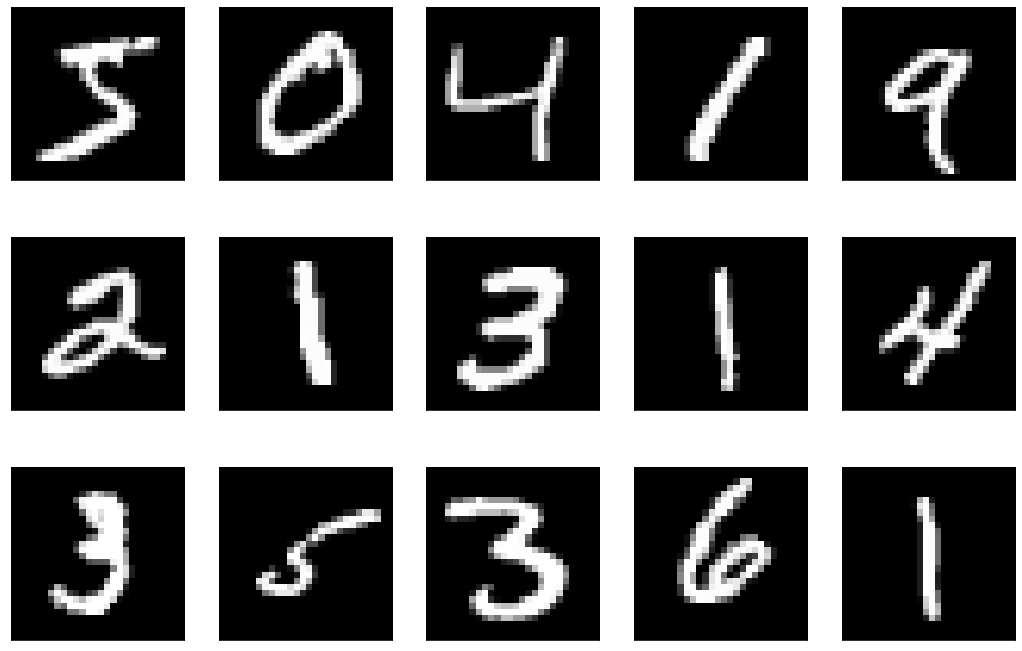

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(18,12),
                        subplot_kw= {'xticks':(), 'yticks':() })

print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

### 데이터 처리
* x_train, x_test (60000, 28, 28) -> (60000, 784)
* y_train, y_test 숫자(0~9)를 2진 벡터형태로 변경( 0 0 0 0 1 0 0 0 0 0)

In [13]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### 모델 만들기
* 첫번째 add =>
    * Dense() : 층의 세부 내용 지정
    * input_dim : 입력층의 뉴런 개수, units : 입력층 이후의 은닉층의 뉴런 개수
    * activation : 활성화 함수 지정
* 두번째 add =>
    * units = 10 : 손글씨의 예측 값이 0~9사이의 값이므로 10개
    * 일반적으로 마지막 층(출력층)이 범주형 여러개 예측일 경우 softmax 함수를 사용

In [14]:
model = Sequential()
model.add(Dense(units = 64, input_dim = 28 * 28, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

2021-11-03 10:40:11.063232: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 모델의 세부 설정
* 비용함수(loss) : categorical_crossentropy(범주형(다항분류)의 경우)
* 최적화함수(optimizer) : sgd(Stochastic Gradient Descent) 알고리즘 이용
* 최종 평가(metrics) : 정확도로 측정(손글씨를 정답을 맞춰는지 아닌지)

In [15]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "sgd", 
              metrics = ["accuracy"])

### 모델 학습시키기

In [16]:
hist = model.fit(X_train, y_train, 
                 validation_data = (X_test, y_test), 
                 epochs = 10, 
                 batch_size = 32)

2021-11-03 11:09:26.677984: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 953us/step - loss: 46.5731 - accuracy: 0.1398 - val_loss: 2.2568 - val_accuracy: 0.1413
Epoch 2/10
1875/1875 [==============================] - 1s 769us/step - loss: 2.1826 - accuracy: 0.1822 - val_loss: 2.0067 - val_accuracy: 0.2397
Epoch 3/10
1875/1875 [==============================] - 1s 789us/step - loss: 2.0870 - accuracy: 0.2463 - val_loss: 2.0217 - val_accuracy: 0.2341
Epoch 4/10
1875/1875 [==============================] - 1s 762us/step - loss: 2.0235 - accuracy: 0.2612 - val_loss: 2.0409 - val_accuracy: 0.2745
Epoch 5/10
1875/1875 [==============================] - 1s 758us/step - loss: 2.1492 - accuracy: 0.2106 - val_loss: 2.2246 - val_accuracy: 0.2439
Epoch 6/10
1875/1875 [==============================] - 1s 705us/step - loss: 2.1260 - accuracy: 0.2130 - val_loss: 2.1837 - val_accuracy: 0.1620
Epoch 7/10
1875/1875 [==============================] - 2s 870us/step - loss: 2.1945 - accuracy: 0.1755 - val_loss: 2.1557 

### 학습을 통해 얻어진 값 살펴보기
* epoch 10번이므로 값이 각각 10개씩

In [17]:
print('## training loss and acc ##')
print(hist.history['loss'])        # 'val_loss' : 평가셋 손실값
print(hist.history['accuracy'])    # 'val_acc'  : 평가셋 정확도

## training loss and acc ##
[46.57307434082031, 2.1825757026672363, 2.0870249271392822, 2.023543119430542, 2.1491522789001465, 2.1260268688201904, 2.1945369243621826, 2.210843563079834, 2.1422791481018066, 2.134946346282959]
[0.139766663312912, 0.18221667408943176, 0.2462666630744934, 0.2612166702747345, 0.21060000360012054, 0.21298334002494812, 0.17553333938121796, 0.16095000505447388, 0.18858332931995392, 0.18658334016799927]


### 모델 평가하기
* 테스트 데이터 셋(x_test, y_test) 을 이용
* 첫번째 값이 : loss 손실값.
* 두번째 값이 : 정확도

In [18]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 0s 668us/step - loss: 2.3289 - accuracy: 0.2049
## evaluation loss and_metrics ##
[2.328918695449829, 0.20489999651908875]


## 데이터 정규화 후 모델 생성

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


### X_train의 데이터 정보를 하나 보기

In [20]:
print(X_train.shape)  # 60000 만개, 28행, 28열
X_train[0].shape

(60000, 28, 28)


(28, 28)

### 신경망에 맞추어 주기 위해 데이터 전처리
* 학습 데이터
* 테스트 데이터

In [21]:
# X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경
# 데이터 값의 범위 0~255 -> 0~1 
# X_train.astype('float64')  
# X_train = X_train/255

# 이렇게도 가능
X_train = X_train.reshape(X_train.shape[0],784).astype('float64') / 255

In [22]:
print(X_train.shape)               # 데이터 크기
np.min(X_train), np.max(X_train)   # 값의 범위

(60000, 784)


(0.0, 1.0)

In [23]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [24]:
print(X_test.shape)               # 데이터 크기
np.min(X_test), np.max(X_test)    # 값의 범위

(10000, 784)


(0.0, 1.0)

### 출력데이터 검증을 위해 10진수의 값을 One-Hot Encoding을 수행

In [25]:
# OneHotEncoding - 10진수의 값을 0, 1의 값을 갖는 벡터로 표현
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### 변환 전후 비교

In [26]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [27]:
Y_train[0:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 딥러닝 모델 만들기

In [52]:
m = Sequential()
m.add(Dense(512, input_dim = 784, activation = 'tanh'))
# m.add(Dense(256, activation = "tanh"))
m.add(Dense(128, activation = 'tanh'))
# m.add(Dense(64, activation = "tanh"))
m.add(Dense(10, activation = 'softmax'))  #softmax

### 오차함수 :categorical_crossentropy, 최적화 함수 : adam

In [53]:
m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

In [54]:
### 배치 사이즈 200, epochs 30회 실행,
history = m.fit(X_train, Y_train, 
                validation_data=(X_test, Y_test),
                epochs = 10,
                batch_size = 32,
                )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2287 - accuracy: 0.9310 - val_loss: 0.1367 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1129 - accuracy: 0.9653 - val_loss: 0.1071 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0834 - accuracy: 0.9740 - val_loss: 0.0959 - val_accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.0872 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.1080 - val_accuracy: 0.9653
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0795 - val_accuracy: 0.9763
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0778 - val_accuracy:

In [55]:
print("Test Accuracy : %.4f" %(m.evaluate(X_test, Y_test)[1]))

pred = m.predict(X_test)

print("pred shape :", pred.shape)
print(pred[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9783
Test Accuracy : 0.9783
pred shape : (10000, 10)
[1.08948534e-07 1.93149517e-05 9.99966025e-01 1.05121189e-05
 1.59543878e-10 3.11733601e-07 8.29878832e-09 2.13704748e-10
 3.72398995e-06 3.89504040e-10]


In [ ]:
# 은닉층 2 - 512, 128            activation = relu -> loss: 0.0158 - accuracy: 0.9951 - Test Accuracy : 0.9807
# 은닉층 3 - 512, 256, 128       activation = relu -> loss: 0.0199 - accuracy: 0.9938 - Test Accuracy : 0.9802
# 은닉층 4 - 512, 256, 128, 64   activation = relu -> loss: 0.0208 - accuracy: 0.9935 - Test Accuracy : 0.9801

# 은닉층 2 - 512, 128            activation = tanh -> loss: 0.0265 - accuracy: 0.9908 - Test Accuracy : 0.9783
# 은닉층 2 - 512, 256            activation = tanh -> loss: 0.0223 - accuracy: 0.9922 - Test Accuracy : 0.9781
# 은닉층 3 - 512, 256, 128       activation = tanh -> loss: 0.0337 - accuracy: 0.9888 - Test Accuracy : 0.9764
# 은닉층 4 - 512, 256, 128, 64   activation = tanh -> loss: 0.0413 - accuracy: 0.9863 - Test Accuracy : 0.9720